In [2]:
data(mtcars)
mtc <- subset(mtcars, select=c("mpg", "cyl", "disp", "wt", "qsec"))
head(mtc)

                   mpg cyl disp    wt  qsec
Mazda RX4         21.0   6  160 2.620 16.46
Mazda RX4 Wag     21.0   6  160 2.875 17.02
Datsun 710        22.8   4  108 2.320 18.61
Hornet 4 Drive    21.4   6  258 3.215 19.44
Hornet Sportabout 18.7   8  360 3.440 17.02
Valiant           18.1   6  225 3.460 20.22

In [3]:
library(ggplot2)
g <- ggplot(mtc, aes(qsec))
g

ERROR: Error: No layers in plot


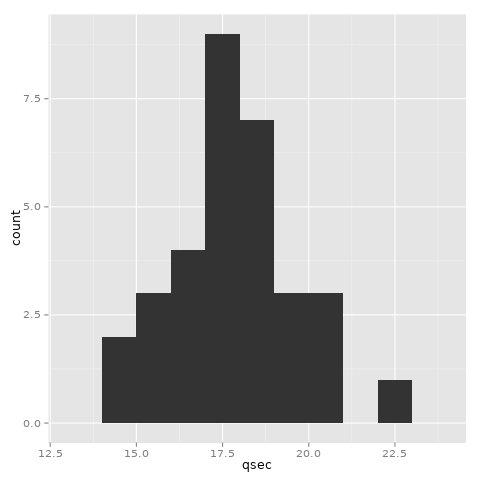

In [4]:
# oops
# nothing to show, because we didn't add a stat or a geom
g + stat_bin(binwidth=1)

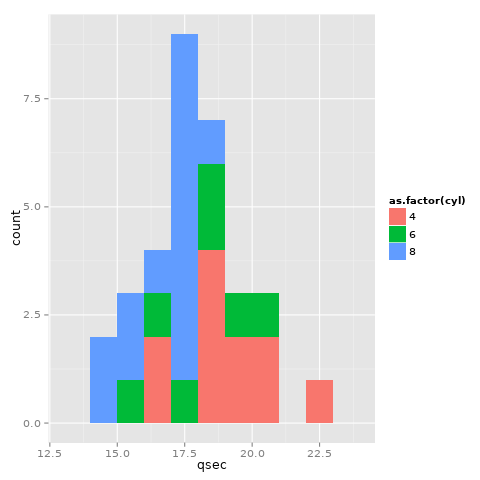

In [6]:
# stat_bin automatically draws the bar geom
# some stats and geoms are linked like this

# what if we want to see qsec broken out by cyl?
g <- ggplot(mtc, aes(qsec, fill=as.factor(cyl))) + stat_bin(binwidth=1)
g

In [ ]:
# I converted cyl to a "factor" (a categorical variable)
# so that it would interact nicely with the fill aesthetic